# Jupyter Notebook: Parsing JSON and Visualizing Orbit Path Data

In this notebook, we will load a JSON file, convert it to a pandas DataFrame, and then create visualizations using geopandas.

In [9]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['geopandas'])
await piplite.install(['numpy'])

In [10]:
# Import necessary libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

## Step 1: Read JSON File and Parse Data

In [11]:
# Load the JSON file
with open('tle.ivanstanojevic.me.json', 'r') as f:
    data = json.load(f)

# Extract relevant information
satellite_data = []
for item in data['member']:
    satellite_data.append({
        'satelliteId': item['satelliteId'],
        'name': item['name'],
        'date': item['date'],
        'line1': item['line1'],
        'line2': item['line2']
    })
    
# Load the data into a DataFrame
df = pd.DataFrame(satellite_data)
df.head(15)

,satelliteId,name,date,line1,line2
0,25544,ISS (ZARYA),2024-09-24T06:35:05+00:00,1 25544U 98067A 24268.27436881 -.00000262 0...,2 25544 51.6388 184.5903 0006708 25.8066 112...
1,40075,AISSAT 2,2023-12-28T11:59:02+00:00,1 40075U 14037G 23362.49933056 .00003465 0...,2 40075 98.3401 268.4723 0004780 335.0232 25...
2,36797,AISSAT 1,2024-09-24T13:27:42+00:00,1 36797U 10035C 24268.56090390 .00005114 0...,2 36797 98.1699 133.7824 0009640 348.8741 11...
3,43694,PROXIMA I,2024-05-18T00:08:26+00:00,1 43694U 18088E 24139.00585883 .10206033 -1...,2 43694 84.9863 193.3607 0012302 259.8395 100...
4,47966,CENTAURI-3 (TYVAK-0210),2024-06-20T10:55:17+00:00,1 47966U 21023B 24172.45505936 .04045857 1...,2 47966 44.9956 207.2793 0004403 32.9642 327...
5,42826,NORSAT 1,2023-12-28T12:04:24+00:00,1 42826U 17042B 23362.50305728 .00005191 0...,2 42826 97.3809 189.6376 0012000 291.5946 68...
6,28654,NOAA 18,2024-09-24T11:10:07+00:00,1 28654U 05018A 24268.46536777 .00000457 0...,2 28654 98.8678 344.5817 0015008 139.5456 220...
7,42828,NORSAT 2,2024-09-24T11:46:36+00:00,1 42828U 17042D 24268.49070571 .00013337 0...,2 42828 97.3822 89.9326 0015604 77.9493 282...
8,43786,ITASAT,2024-09-24T02:41:39+00:00,1 43786U 18099AE 24268.11225996 .00016438 0...,2 43786 97.4987 322.6588 0016507 19.6927 340...
9,42759,ZHUHAI-1 02 (CAS-4B),2024-09-24T15:06:10+00:00,1 42759U 17034B 24268.62929029 .00035385 0...,2 42759 43.0172 22.5057 0013454 299.0263 60...


## Step 2: Parse TLE Data to Extract Orbital Elements

In [12]:
def parse_tle(line1, line2):
    # Extract orbital elements from TLE lines
    inclination = float(line2[8:16])
    raan = float(line2[17:25])
    eccentricity = float("0." + line2[26:33])
    arg_of_perigee = float(line2[34:42])
    mean_anomaly = float(line2[43:51])
    mean_motion = float(line2[52:63])
    return inclination, raan, eccentricity, arg_of_perigee, mean_anomaly, mean_motion

# Apply TLE parsing to the DataFrame
df[['inclination', 'raan', 'eccentricity', 'arg_of_perigee', 'mean_anomaly', 'mean_motion']] = df.apply(
    lambda row: pd.Series(parse_tle(row['line1'], row['line2'])), axis=1
)

df.head(15)

,satelliteId,name,date,line1,line2,inclination,raan,eccentricity,arg_of_perigee,mean_anomaly,mean_motion
0,25544,ISS (ZARYA),2024-09-24T06:35:05+00:00,1 25544U 98067A 24268.27436881 -.00000262 0...,2 25544 51.6388 184.5903 0006708 25.8066 112...,51.6388,184.5903,0.000671,25.8066,112.1770,15.495627
1,40075,AISSAT 2,2023-12-28T11:59:02+00:00,1 40075U 14037G 23362.49933056 .00003465 0...,2 40075 98.3401 268.4723 0004780 335.0232 25...,98.3401,268.4723,0.000478,335.0232,25.0749,14.856018
2,36797,AISSAT 1,2024-09-24T13:27:42+00:00,1 36797U 10035C 24268.56090390 .00005114 0...,2 36797 98.1699 133.7824 0009640 348.8741 11...,98.1699,133.7824,0.000964,348.8741,11.2262,14.921834
3,43694,PROXIMA I,2024-05-18T00:08:26+00:00,1 43694U 18088E 24139.00585883 .10206033 -1...,2 43694 84.9863 193.3607 0012302 259.8395 100...,84.9863,193.3607,0.001230,259.8395,100.1524,16.413198
4,47966,CENTAURI-3 (TYVAK-0210),2024-06-20T10:55:17+00:00,1 47966U 21023B 24172.45505936 .04045857 1...,2 47966 44.9956 207.2793 0004403 32.9642 327...,44.9956,207.2793,0.000440,32.9642,327.1551,16.210975
5,42826,NORSAT 1,2023-12-28T12:04:24+00:00,1 42826U 17042B 23362.50305728 .00005191 0...,2 42826 97.3809 189.6376 0012000 291.5946 68...,97.3809,189.6376,0.001200,291.5946,68.3998,14.965865
6,28654,NOAA 18,2024-09-24T11:10:07+00:00,1 28654U 05018A 24268.46536777 .00000457 0...,2 28654 98.8678 344.5817 0015008 139.5456 220...,98.8678,344.5817,0.001501,139.5456,220.6835,14.133381
7,42828,NORSAT 2,2024-09-24T11:46:36+00:00,1 42828U 17042D 24268.49070571 .00013337 0...,2 42828 97.3822 89.9326 0015604 77.9493 282...,97.3822,89.9326,0.001560,77.9493,282.3481,15.039627
8,43786,ITASAT,2024-09-24T02:41:39+00:00,1 43786U 18099AE 24268.11225996 .00016438 0...,2 43786 97.4987 322.6588 0016507 19.6927 340...,97.4987,322.6588,0.001651,19.6927,340.4934,15.064463
9,42759,ZHUHAI-1 02 (CAS-4B),2024-09-24T15:06:10+00:00,1 42759U 17034B 24268.62929029 .00035385 0...,2 42759 43.0172 22.5057 0013454 299.0263 60...,43.0172,22.5057,0.001345,299.0263,60.9243,15.338223


## Step 3: Simulate Orbit Paths

In [13]:
def simulate_orbit(inclination, raan, num_points=360):
    """ Simulate a simple circular orbit based on inclination and RAAN """
    # Generate angles for the orbit
    theta = np.linspace(0, 2 * np.pi, num_points)
    
    # Calculate orbit in latitude and longitude (simplified)
    lat = inclination * np.sin(theta)
    lon = raan + np.rad2deg(theta)
    
    # Normalize longitudes
    lon = (lon + 180) % 360 - 180
    
    return lat, lon

## Step 4: Plot the Orbits on a Global Map

<ipython-input-14-353bc3a62b81>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


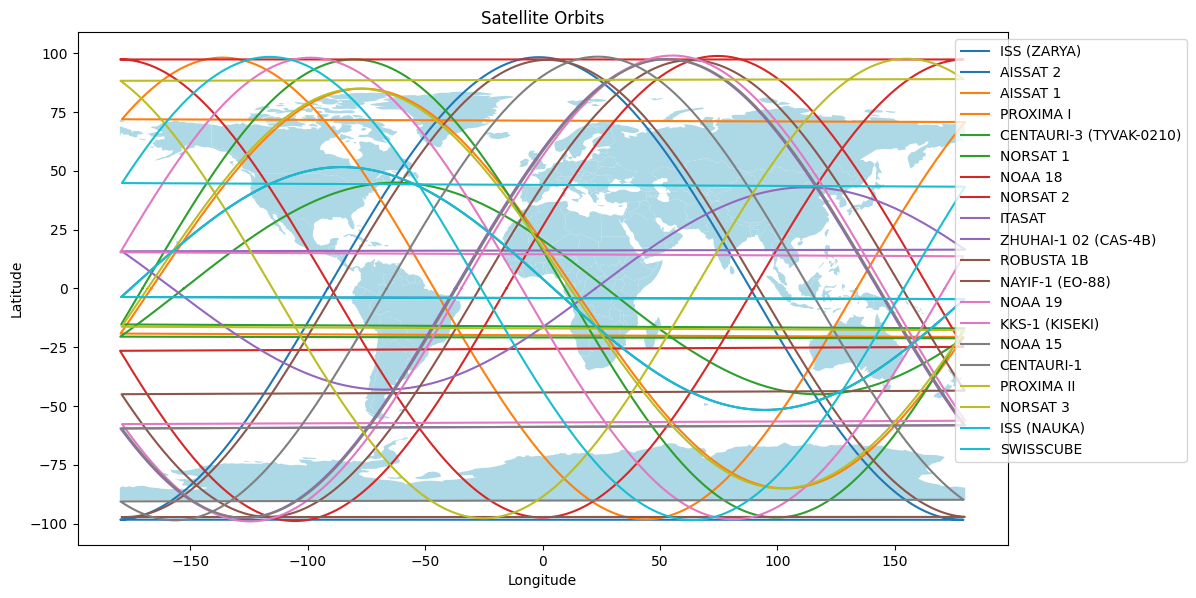

In [14]:
# Load a base world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightblue')

# Loop through each satellite and plot its orbit path
colors = plt.cm.get_cmap('tab10', len(df))

for idx, row in df.iterrows():
    lat, lon = simulate_orbit(row['inclination'], row['raan'])
    ax.plot(lon, lat, label=row['name'], color=colors(idx))

# Customize the plot
ax.set_title("Satellite Orbits")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.show()